1. IMPORT

In [141]:
import  cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from IPython.display import clear_output, display


2. KEYPOINTS USING MP

In [142]:
# holistic model
mp_holistic = mp.solutions.holistic
# drawaing utilities
mp_drawing = mp.solutions.drawing_utils

mp_pose = mp.solutions.pose
mp_hands = mp.solutions.hands
mp_face_mesh = mp.solutions.face_mesh

In [143]:
def mediapipe_detection(image, model):
    # color convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image is no longer wrtieable 
    image.flags.writeable = False
    # make predictions
    results = model.process(image)
    # makes the image writeable again
    image.flags.writeable = True
    # color convert RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [144]:
def draw_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks,
            mp_face_mesh.FACEMESH_TESSELATION
        )

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS
        )

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks,
            mp_hands.HAND_CONNECTIONS
        )

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks,
            mp_hands.HAND_CONNECTIONS
        )


In [145]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [146]:
cap = cv2.VideoCapture(0)

try:
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        while cap.isOpened():
            ret, frame = cap.read()
            image, results = mediapipe_detection(frame, holistic)

            cv2.imshow('OpenCV feed', frame)

            # PRESS 'q' to quit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

except KeyboardInterrupt:
    print("Interrupted manually.")

finally:
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1747178673.682925 3240050 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2 Pro
W0000 00:00:1747178673.787619 3467272 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747178673.808121 3467272 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747178673.811499 3467270 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747178673.811616 3467269 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1747178673.811782 3467271 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling supp

Interrupted manually.


In [147]:
len(results.left_hand_landmarks.landmark)

21

In [148]:
results

mediapipe.python.solution_base.SolutionOutputs

In [149]:
draw_landmarks(frame, results)

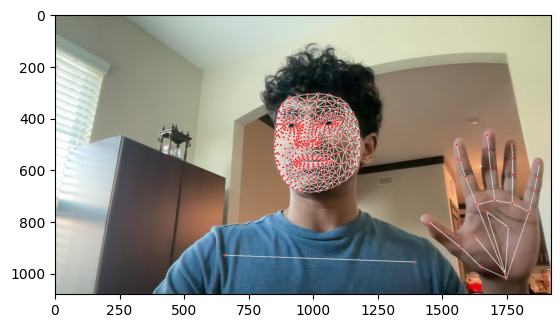

In [150]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

3. EXTRACT KEY POINTS

4. SET UP FOLDERS FOR COLECTION

5. COLLECT KEY POINTS FOR TRININGS AND TESTING

6. PREPROCESS DATA

7. BUILD AND TRAIN LSTM NEURAL NET

8. MAKE PREDICITIONS 

9. SAVE WEIGHTS

10. EVAL USING CONFUSION MATRIX AND ACCURACY

11. TEST